# Importing the packages 

In [5]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import mode
import statsmodels.api as sm

from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics
from lightgbm import LGBMClassifier
import xgboost
from sklearn.linear_model import RidgeClassifier
import pandas.api.types as ptypes
import math,shutil
from sklearn.impute import SimpleImputer
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox
from scipy.stats import norm, skew
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,PowerTransformer,FunctionTransformer



# Importing the Train and Test Data

In [6]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [7]:
#view the train
train.head(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50


In [8]:
train.tail(2)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
318437,318438,19,a,7,Y,5,gynecology,Q,C,2.0,21641,8.0,Emergency,Minor,2,11-20,4752.0,0-10


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [10]:
train.shape , test.shape

((318438, 18), (137057, 17))

In [11]:
#Lets see the null value

train.apply(lambda x: x.isnull().sum())

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [12]:
test.apply(lambda x: x.isnull().sum())

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

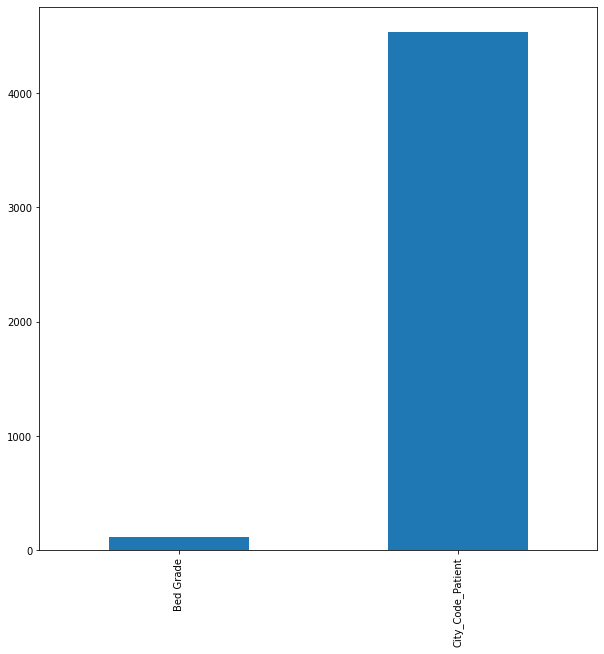

In [13]:
# Training missing value
fig = plt.figure(figsize=(10,10))
missing = train.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

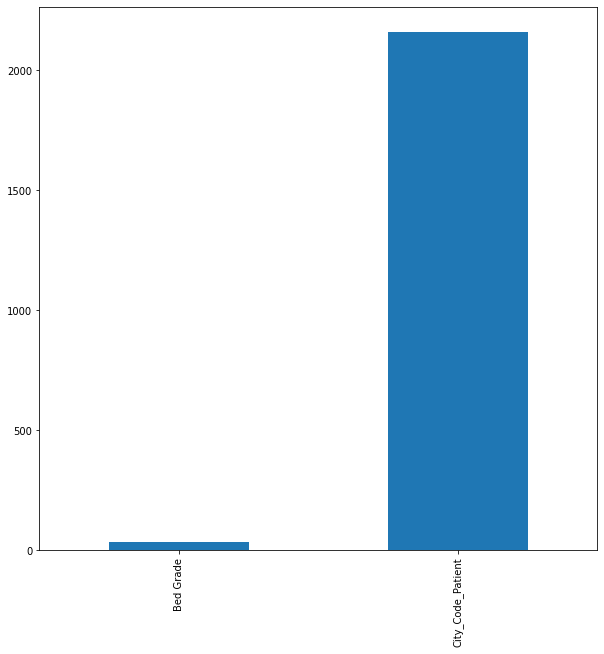

In [14]:
fig = plt.figure(figsize=(10,10))
missing = test.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [15]:
train.isnull().sum()/len(train)*100

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.035486
patientid                            0.000000
City_Code_Patient                    1.423197
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

In [16]:
test.isnull().sum()/len(test)*100

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.025537
patientid                            0.000000
City_Code_Patient                    1.573798
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
dtype: float64

Since patient id and case id isnot important so lets drop

In [17]:
# Uncessary column wich has to be drop
col=['case_id','patientid']
train.drop(col,axis=1,inplace=True)
test.drop(col,axis=1,inplace=True)


##Drop duplicates in training data

In [18]:
train=train.drop_duplicates()

In [19]:
train.shape

(318286, 16)

## Missing Value Imputation

### Bed Grade

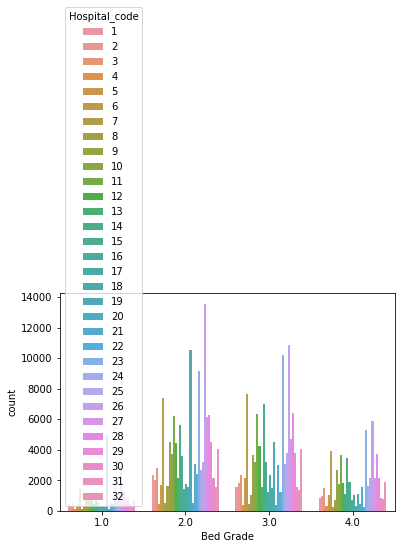

In [20]:
sns.countplot(data=train, x='Bed Grade', hue='Hospital_code')


In [21]:
#Create mask to fill the NA value in Bed Grade

mask_bedGrade=train.pivot_table(index='Hospital_code',values='Bed Grade',aggfunc=(lambda x:mode(x).mode[0]))
mask_bedGrade

,Bed Grade
Hospital_code,
1,2.0
2,2.0
3,2.0
4,2.0
5,3.0
6,3.0
7,2.0
8,2.0
9,2.0


In [22]:
train_Bed_null=train['Bed Grade'].isnull()
test_Bed_null=test['Bed Grade'].isnull()
#impute values
train.loc[train_Bed_null,'Bed Grade']=train.loc[train_Bed_null,'Hospital_code'].apply(lambda x:mask_bedGrade.loc[x])
test.loc[test_Bed_null,'Bed Grade']=test.loc[test_Bed_null,'Hospital_code'].apply(lambda x:mask_bedGrade.loc[x])

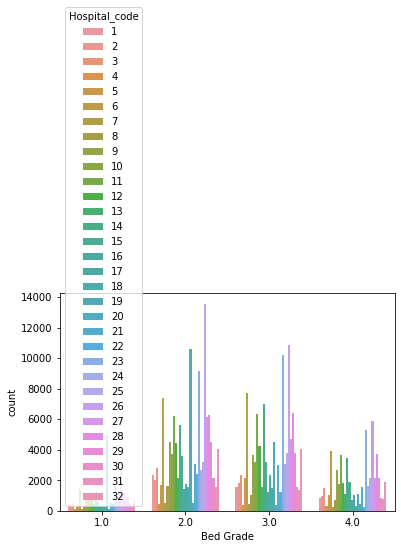

In [23]:
sns.countplot(data=train, x='Bed Grade', hue='Hospital_code')

Seems there is no impact on Bed Grade after imputation

### City_Code_Patient


In [24]:
train.describe()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318286.000000,318286.000000,318286.000000,318286.000000,313755.000000,318286.000000,318286.000000
mean,18.318814,4.771064,3.197797,2.625981,7.251872,3.283757,4880.782406
std,8.634226,3.102720,1.168239,0.873010,4.745942,1.763216,1086.816289
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1800.000000
25%,11.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4186.000000
50%,19.000000,5.000000,3.000000,3.000000,8.000000,3.000000,4741.000000
75%,26.000000,7.000000,4.000000,3.000000,8.000000,4.000000,5409.000000
max,32.000000,13.000000,24.000000,4.000000,38.000000,32.000000,11008.000000


In [25]:
# imputation for catgorical variable in City_Code_Patient

train['City_Code_Patient'] = train['City_Code_Patient'].fillna( train['City_Code_Patient'].dropna().mode().values[0] )
test['City_Code_Patient'] = test['City_Code_Patient'].fillna( test['City_Code_Patient'].dropna().mode().values[0] )

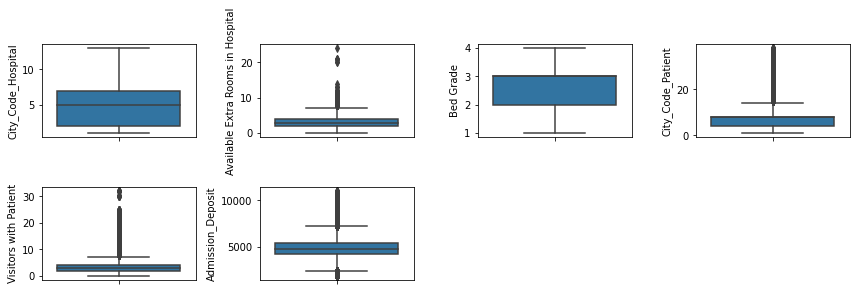

In [26]:
#NUMERIC#
######BOXPLOTS VISUALISATION####
num=['City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']
numerical_features = train[num]
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

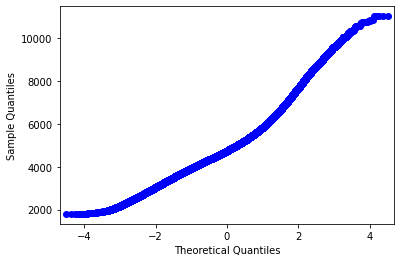

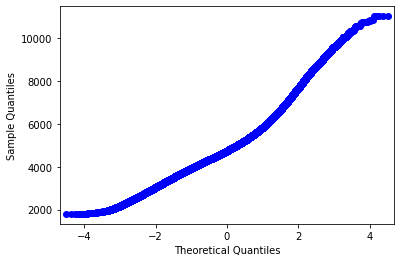

In [27]:
sm.qqplot(train['Admission_Deposit'])

In [28]:
#OUTLIER TREATMENT#
train.Admission_Deposit.loc[train.Admission_Deposit > 8344.0]=8344.0
train.Admission_Deposit.loc[train.Admission_Deposit < 2741.0]=2741.0
test.Admission_Deposit.loc[test.Admission_Deposit > 8308.0]=8308.0
test.Admission_Deposit.loc[test.Admission_Deposit < 2749.0]=2749.0

In [29]:
test.describe()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000,137057.000000
mean,18.343747,4.758692,3.192686,2.634575,7.255894,3.284531,4866.194948
std,8.634694,3.102245,1.164250,0.869205,4.753709,1.777270,1051.495448
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2749.000000
25%,11.000000,2.000000,2.000000,2.000000,4.000000,2.000000,4178.000000
50%,19.000000,5.000000,3.000000,3.000000,8.000000,3.000000,4731.000000
75%,26.000000,7.000000,4.000000,3.000000,8.000000,4.000000,5398.000000
max,32.000000,13.000000,21.000000,4.000000,38.000000,32.000000,8308.000000


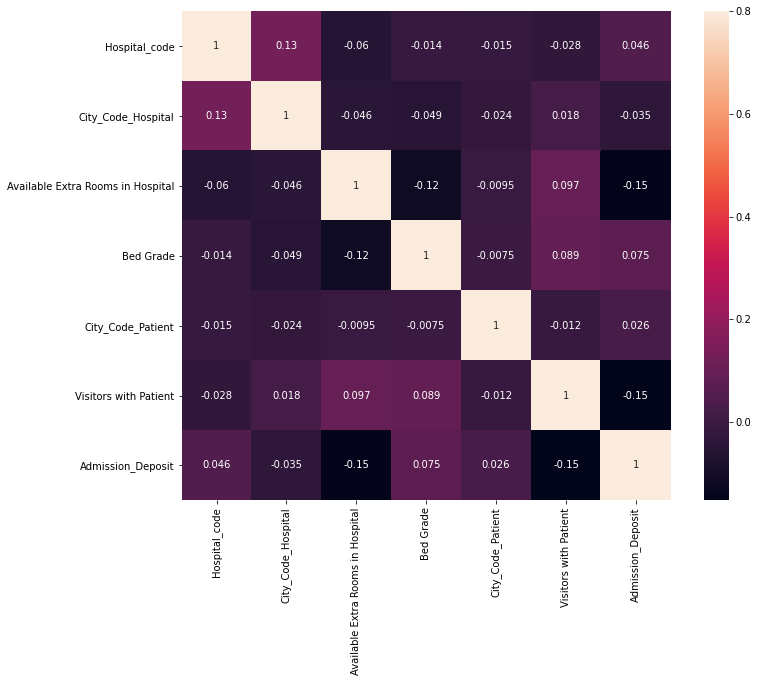

In [30]:
#CORRELATION#
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,annot = True,square=True);

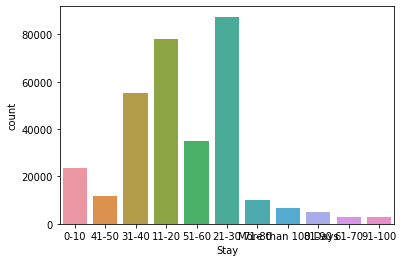

In [31]:
#TARGET VARIABLE#
sns.countplot(train['Stay'])

In [32]:
## SEPEARTION CATEGORY VS NUMERIC

continuous = []
cat = []

for i in train.columns:
    if train[i].dtype == "object":
        cat.append(i)
    else: continuous.append(i)

print("Continuous:", continuous)
print("-")
print("Categorical:", cat)

Continuous: ['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']
-
Categorical: ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']


In [33]:
#LABEL ENCODING#
lk={'Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission',
    'Severity of Illness','Age'}
for i in lk:
    train[i]=train[i].astype(str)


for col in lk:
    lbl_enc = LabelEncoder() 
    train[col] = lbl_enc.fit_transform(train[col])


for i in lk:
    test[i]=test[i].astype(str)


for col in lk:
    lbl_enc = LabelEncoder() 
    test[col] = lbl_enc.fit_transform(test[col])    
    

In [34]:
#TARGET TRANSFORMATION#
target_map = {'21-30':0, '11-20':1, '31-40':2,'51-60':3,'0-10':4,'41-50':5,'71-80':6,'More than 100 Days':7,'81-90':8,
              '91-100':9,'61-70':10}
target_map_inverse = {0:'21-30', 1:'11-20', 2:'31-40',3:'51-60',4:'0-10',5:'41-50',6:'71-80',7:'More than 100 Days',8:'81-90',
                      9:'91-100',10:'61-70'}
gs={'Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission',
    'Severity of Illness','Age','Bed Grade','City_Code_Hospital'}

master = pd.concat([train.drop(['Stay'],axis=1),test])
master=pd.get_dummies(master,columns=gs)
master.head()

,Hospital_code,Available Extra Rooms in Hospital,City_Code_Patient,Visitors with Patient,Admission_Deposit,Ward_Facility_Code_0,Ward_Facility_Code_1,Ward_Facility_Code_2,Ward_Facility_Code_3,Ward_Facility_Code_4,Ward_Facility_Code_5,Hospital_type_code_0,Hospital_type_code_1,Hospital_type_code_2,Hospital_type_code_3,Hospital_type_code_4,Hospital_type_code_5,Hospital_type_code_6,Type of Admission_0,Type of Admission_1,Type of Admission_2,Severity of Illness_0,Severity of Illness_1,Severity of Illness_2,Hospital_region_code_0,Hospital_region_code_1,Hospital_region_code_2,Ward_Type_0,Ward_Type_1,Ward_Type_2,Ward_Type_3,Ward_Type_4,Ward_Type_5,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Department_0,Department_1,Department_2,Department_3,Department_4,Bed Grade_1.0,Bed Grade_2.0,Bed Grade_3.0,Bed Grade_4.0,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_4,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,City_Code_Hospital_10,City_Code_Hospital_11,City_Code_Hospital_13
0,8,3,7.0,2,4911.0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,2,7.0,2,5954.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,10,2,7.0,2,4745.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,26,2,7.0,2,7272.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,26,2,7.0,2,5558.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [35]:
master['Hospital_code'].dtypes

dtype('int64')

In [36]:
#MODEL BUILDING#
X, y = master.iloc[:len(train)], train['Stay']
y=y.map(target_map)
X_test = master.iloc[len(train):]
print(X.shape,X_test.shape)

(318286, 63) (137057, 63)


In [37]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)
X_test=pd.DataFrame(X_test)

In [38]:
X_test.head()

,Hospital_code,Available Extra Rooms in Hospital,City_Code_Patient,Visitors with Patient,Admission_Deposit,Ward_Facility_Code_0,Ward_Facility_Code_1,Ward_Facility_Code_2,Ward_Facility_Code_3,Ward_Facility_Code_4,Ward_Facility_Code_5,Hospital_type_code_0,Hospital_type_code_1,Hospital_type_code_2,Hospital_type_code_3,Hospital_type_code_4,Hospital_type_code_5,Hospital_type_code_6,Type of Admission_0,Type of Admission_1,Type of Admission_2,Severity of Illness_0,Severity of Illness_1,Severity of Illness_2,Hospital_region_code_0,Hospital_region_code_1,Hospital_region_code_2,Ward_Type_0,Ward_Type_1,Ward_Type_2,Ward_Type_3,Ward_Type_4,Ward_Type_5,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Department_0,Department_1,Department_2,Department_3,Department_4,Bed Grade_1.0,Bed Grade_2.0,Bed Grade_3.0,Bed Grade_4.0,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_4,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,City_Code_Hospital_10,City_Code_Hospital_11,City_Code_Hospital_13
0,21,3,2.0,2,3095.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,29,2,2.0,4,4018.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,26,3,2.0,3,4492.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,6,3,2.0,3,4173.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,28,2,2.0,4,4161.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


**Scaling**

In [39]:
#SCALING#
rsb=RobustScaler()
X = rsb.fit_transform(X)
X_test = rsb.transform(X_test)

In [40]:
y.shape ,X.shape

((318286, 1), (318286, 63))

## Logistic Regression 

In [106]:
#HyperParameter Tunning

model=RandomForestClassifier()
param = {
         'n_estimators':[100,105,110],
         'max_depth':[4,5,6,7,8,9,10],
         'min_samples_split':[0.1],
         'min_samples_leaf':[0.1]
         }
clf= GridSearchCV(model,param,scoring='accuracy',refit=True,cv=3)
clf.fit(X,y)
print(clf.best_score_, clf.best_params_)

0.289431522497333 {'max_depth': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 105}


In [111]:
i=0
#Logistic Regression with best parameter with statified k-fold
fold=StratifiedKFold(n_splits=6,shuffle=True,random_state=1021)
predictions=np.zeros((len(X_test),11))
model=RandomForestClassifier()
param = {
         'n_estimators':[105],
         'max_depth':[6],
         'min_samples_split':[0.1],
         'min_samples_leaf':[0.1]
         }
clf= GridSearchCV(model,param,scoring='accuracy')
for  train_index,test_index in fold.split(X,y):   
 print('Train:',train_index,'Validation:',test_index)
 X1_train, X1_test = X.iloc[train_index],X.iloc[test_index]
 y1_train, y1_test = y.iloc[train_index],y.iloc[test_index]
 #model
 i=i+1
 print( "\nFold ", i)
 clf.fit(X1_train,y1_train)
 print('Accuracy:',clf.best_score_)
 pred=clf.predict(X1_test)
 print('Test_Accuracy',(accuracy_score(y1_test,pred)*100))


pred=clf.predict(X_test)

Train: [     0      1      2 ... 318282 318283 318284] Validation: [     4      7     12 ... 318278 318279 318285]

Fold  1
Accuracy: 0.28845415321679735
Test_Accuracy 28.621248680440353
Train: [     0      1      2 ... 318283 318284 318285] Validation: [    14     21     31 ... 318280 318281 318282]

Fold  2
Accuracy: 0.28822416749126367
Test_Accuracy 28.832378223495702
Train: [     0      2      3 ... 318282 318283 318285] Validation: [     1     18     29 ... 318275 318277 318284]

Fold  3
Accuracy: 0.2873004674960139
Test_Accuracy 28.87950535364198
Train: [     1      3      4 ... 318283 318284 318285] Validation: [     0      2      9 ... 318270 318274 318276]

Fold  4
Accuracy: 0.28728914440498793
Test_Accuracy 28.87950535364198
Train: [     0      1      2 ... 318282 318284 318285] Validation: [     8     10     11 ... 318258 318264 318283]

Fold  5
Accuracy: 0.28779705978420067
Test_Accuracy 28.823496144928086
Train: [     0      1      2 ... 318283 318284 318285] Validation: [

In [ ]:
#LIGHT GBM# # BEST PARAMETER SELECTION#

skf = StratifiedKFold(n_splits=2, shuffle = True, random_state = 1001)
param_test ={'num_leaves': [6], 
             'min_child_samples': [100], 
             'min_child_weight': [1e-5],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1],
             'reg_lambda': [0, 1e-1,1]}

n_HP_points_to_test = 100

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='multi_logloss', n_estimators=50)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='accuracy',
    cv=skf.split(X,y),
    refit=True,
    random_state=314,n_jobs=6,
    verbose=True)

gs.fit(X, y)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))


Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  7.3min


In [113]:
submission=pd.read_csv('/content/sample_submission_lfbv3c3.csv')

In [114]:
submission['Stay']=clf.predict(X_test)
submission['Stay']=submission['Stay'].map(target_map_inverse)

In [116]:
submission.to_csv('HealthcareII.csv',index=False)